# __Exploratory Data Analysis  Project 6__

Created by Nolan Moss

Date: 2/10/2024

__Summary:__
This project uses popular libraries for data analytics and introduces a common process for exploratory data analysis projects. This will perform exploratory data analysis (EDA) using pandas and other tools as needed. It will create plots to gain visual insights into the data. It is analyzing the seaborn dataframe of the Dow Jones from 1914-12-01 to 1968-12-01. Established in 1896, DJIA, the Dow Jones, tracks 30 major U.S. companies, serving as a key indicator of the overall economic health of the U.S. stock market. The goal of this project is meant to analyze the data in many different ways to determine if the DJIA is a good long-term investment.

### __Project setup__

Import Modules

In [123]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Acquisition

In [124]:
# Load the data into a DataFrame
df = sns.load_dataset('dowjones')

# Inspect first rows of the DataFrame
print(df.head())

        Date  Price
0 1914-12-01  55.00
1 1915-01-01  56.55
2 1915-02-01  56.00
3 1915-03-01  58.30
4 1915-04-01  66.45


In [125]:
# Calculate Price Change
df['Price Change'] = df['Price'].diff()

# Renaming columns 
df = df.rename(columns={'Price': 'Selling Price'})

# Create 'Type' column based on Price Change
df['Type'] = df['Price Change'].apply(lambda x: 'Gain' if x > 0 else 'Loss' if x < 0 else 'No Change')

# Renaming columns 
df = df.rename(columns={'Type': 'Dow Jones Performance Status'})



Initial Data Inspection

In [126]:
# Data inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

        Date  Selling Price  Price Change Dow Jones Performance Status
0 1914-12-01          55.00           NaN                    No Change
1 1915-01-01          56.55          1.55                         Gain
2 1915-02-01          56.00         -0.55                         Loss
3 1915-03-01          58.30          2.30                         Gain
4 1915-04-01          66.45          8.15                         Gain
5 1915-05-01          65.95         -0.50                         Loss
6 1915-06-01          68.40          2.45                         Gain
7 1915-07-01          71.85          3.45                         Gain
8 1915-08-01          79.25          7.40                         Gain
9 1915-09-01          85.50          6.25                         Gain
(649, 4)
Date                            datetime64[ns]
Selling Price                          float64
Price Change                           float64
Dow Jones Performance Status            object
dtype: object


Initial Descriptive Statistics

In [127]:
# Assuming df is your DataFrame with numerical columns
descriptive_stats = df.describe()

# Apply custom formatting
styled_stats = descriptive_stats.style.format()

# Display the styled DataFrame
styled_stats

,Date,Selling Price,Price Change
count,649,649.000000,648.000000
mean,1941-11-30 17:42:48.258859776,290.807319,1.404923
min,1914-12-01 00:00:00,46.850000,-71.070000
25%,1928-06-01 00:00:00,106.900000,-3.062500
50%,1941-12-01 00:00:00,172.270000,1.835000
75%,1955-06-01 00:00:00,436.730000,6.132500
max,1968-12-01 00:00:00,985.930000,58.610000
std,nan,256.062906,12.483962


### __Data Exploration__

__Histograms__

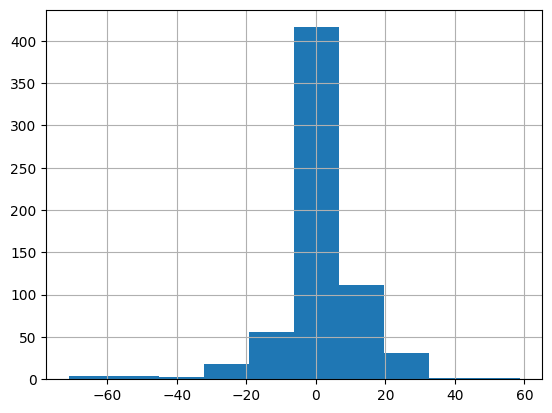

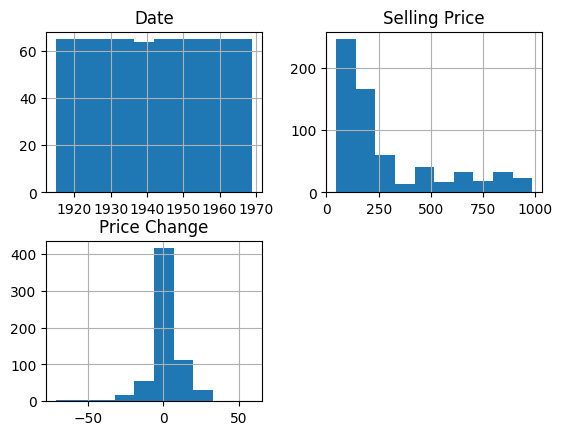

In [128]:
# Inspect histogram by numerical column
df['Price Change'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

__Dow Jones Performance Status Count__

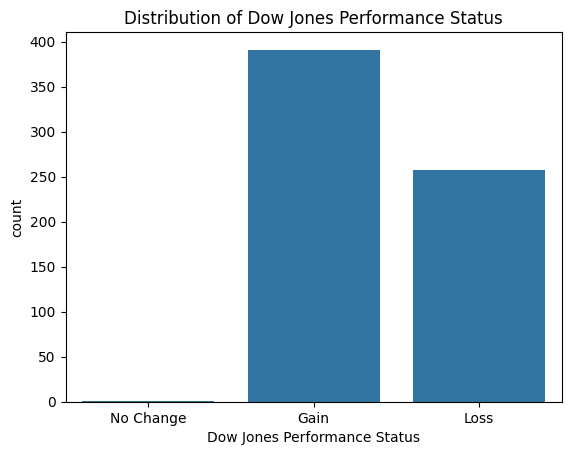

In [129]:
# Inspect value counts by categorical column
df['Dow Jones Performance Status'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

Observations:

- The distribution of the "Dow Jones Performance Status" column indicates the performance status of the Dow Jones index. This column contains categories such as Gain, Loss, and No Change.
- This reveals that there are about 150 more months of gains than there are of losses.
- Almost all dates experience some amount of change.


__Line chart of Selling Price__

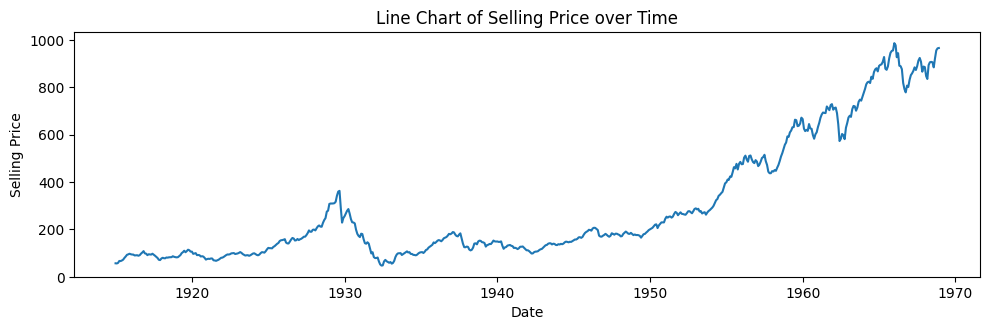

In [130]:
# Convert the 'Date' column to Timestamp format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame to include only dates between 1915 and 1970
filtered_df = df[(df['Date'] >= pd.Timestamp('1915')) & (df['Date'] <= pd.Timestamp('1970'))]

# Plotting
plt.figure(figsize=(10, 6))

# Line plot
plt.subplot(2, 1, 1)
plt.plot(filtered_df['Date'], filtered_df['Selling Price'])
plt.title('Line Chart of Selling Price over Time')
plt.xlabel('Date')
plt.ylabel('Selling Price')

# Show plots
plt.tight_layout()
plt.show()

Observation:

- The line chart illustrates the trend of selling prices over time within the specified period (1915 to 1970).
- By plotting selling prices against dates, we can observe how the selling prices have fluctuated over the years.
- Analyzing the trend provides insights into the overall performance and volatility of the Dow Jones index during the specified timeframe.
- Any significant peaks or troughs in the line may indicate major market events or economic shifts that affected selling prices during that period.
- These trends can be identified by examining the slope of the line.
- The trend of this chart shows long-term growth with periods of volatility and stability.

__Bar Chart of Selling Price__

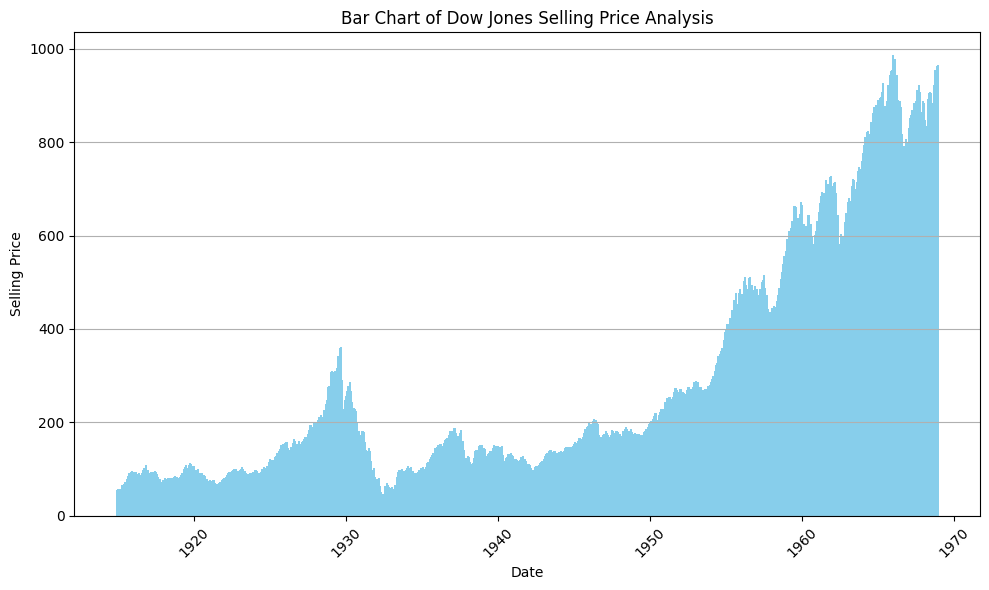

In [131]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Selling Price'], color='skyblue', width=50)

# Customize the plot
plt.title('Bar Chart of Dow Jones Selling Price Analysis')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Add grid lines only on the y-axis

# Show the plot
plt.tight_layout()
plt.show()

Observations:

- The bar chart displays the selling prices of the Dow Jones index over time.
- Each bar represents the selling price for a specific date.
- The height of each bar indicates the selling price at that particular date.
- It allows for easy comparison of selling prices across different dates and can reveal patterns or trends in the data.
- Similar to the line chart, it reveals long-term growth with periods of loss and volatility.

__Histogram of Selling Price__

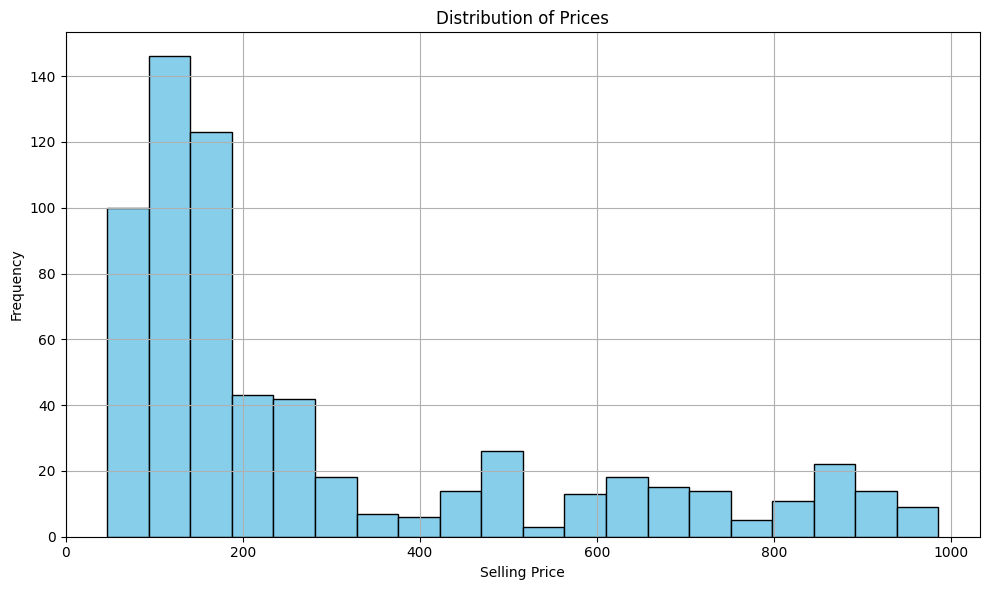

In [132]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Selling Price'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Customize the plot
plt.title('Distribution of Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Observations:

- This is a histogram showing the distribution of prices in the dataset.
- This chart depicts that the Dow Jones is more frequently sold at a lower price.

Bar Chart of Price Change

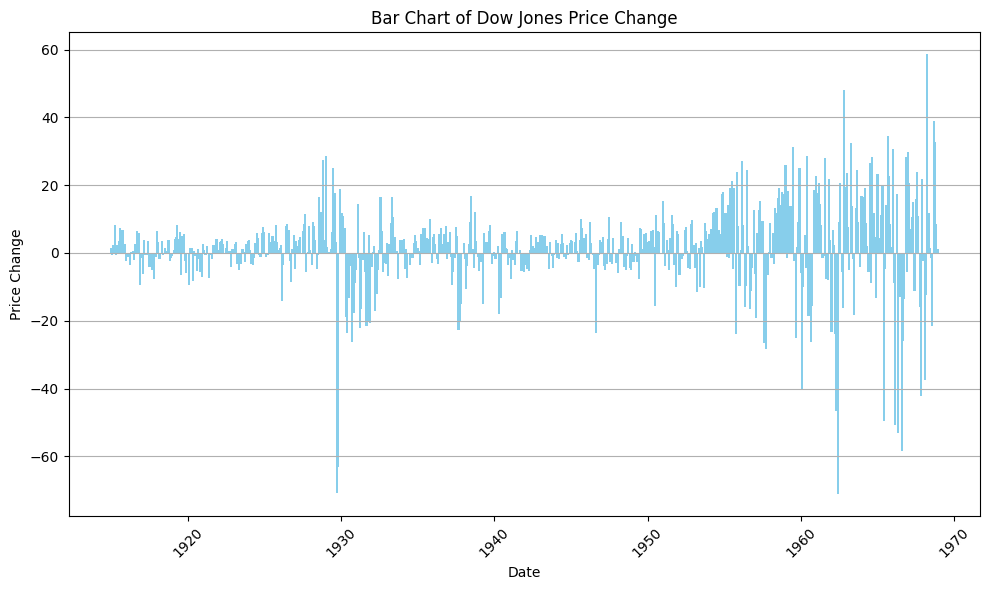

In [133]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Price Change'], color='skyblue', width=50)

# Customize the plot
plt.title('Bar Chart of Dow Jones Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Add grid lines only on the y-axis

# Show the plot
plt.tight_layout()
plt.show()

Observation:

- This bar chart shows that there have been dates with drastic volatility.
- The amount of price change seems almost equal comparing the data in this way.
- Dates near 1930 and 1960 show times with the most significant loss.


__Conclusion:__

The analysis reveals that the Dow Jones (DJIA) has shown a long-term upward trend despite experiencing periods of volatility. Economic conditions, geopolitical events, and market sentiment play significant roles in influencing the performance of the DJIA. Investors with a long-term investment horizon may find the DJIA to be a suitable option, although it carries inherent risks like any other equity investment.